In [70]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [71]:
def uv2xyz(uv,imW,imH):
    tetha = - (uv[:,1] - imH / 2) * np.pi / imH
    phi = (uv[:,0] - imW / 2) * 2 * np.pi / imW
    xyz = np.array([np.sin(phi) * np.cos(tetha),np.cos(tetha) * np.cos(phi),np.sin(tetha)])
    return xyz.T

In [72]:
# load image
img_path = "/home/clara/Workspace/GIT_CFL_full/python/"
img_name = "pano_ajjyfrdhqyllgb.jpg"
img = Image.open(img_path+img_name)
img = np.array(img)
pano_H = img.shape[0]
pano_W = img.shape[1]

# GT corners
cor_uv = np.array([[207, 163], [207, 392], [435, 207], [435, 336], [539, 204], [539, 340], \
                         [615, 114], [616, 439], [719, 187], [719, 364], [811, 184], [811, 367]])

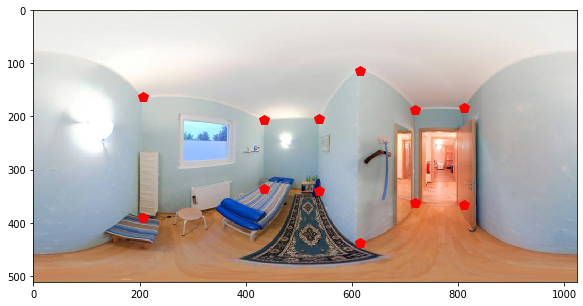

In [73]:
# show image with gt corners in 2D
plt.plot(cor_uv[:,0], cor_uv[:,1], 'rp', markersize=10)
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(img)

In [74]:
# project pixel coordinates onto the unit sphere
cor_xyz = uv2xyz(cor_uv,pano_W,pano_H)

# separate ceiling and floor corners according to the horizon line (if image is aligned, the horizon line is centered)
ceil_xyz = cor_xyz[cor_xyz[:,2]>0,:]
floor_xyz = cor_xyz[cor_xyz[:,2]<0,:]

In [75]:
# floor plane - assumption: camera at 1.7m
d_floor = 1.7
t_floor = -d_floor/floor_xyz[:,2]
floor_3D = np.expand_dims(t_floor, axis=1) * floor_xyz

In [76]:
# ceiling plane - assumption: ceiling plane and floor plane are parallel
t_ceil = floor_3D[:,0]/ceil_xyz[:,0]
ceil_3D = np.expand_dims(t_ceil, axis=1) * ceil_xyz
d_ceil = np.mean(t_ceil*ceil_xyz[:,2])
ceil_3D[:,2] = d_ceil

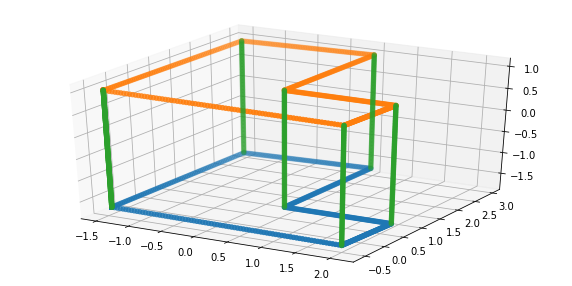

In [142]:
# sample points to visualize 3D layout
n = 80

floor_3D = np.vstack((floor_3D, floor_3D[0,:]))
ceil_3D = np.vstack((ceil_3D, ceil_3D[0,:]))

floor_structure = np.array([[np.linspace(floor_3D[p,0],floor_3D[p+1,0],n), \
                   np.linspace(floor_3D[p,1],floor_3D[p+1,1],n), \
                   np.linspace(floor_3D[p,2],floor_3D[p+1,2],n)] for p in range(len(floor_3D)-1)])
ceil_structure = np.array([[np.linspace(ceil_3D[p,0],ceil_3D[p+1,0],n), \
                   np.linspace(ceil_3D[p,1],ceil_3D[p+1,1],n), \
                   np.linspace(ceil_3D[p,2],ceil_3D[p+1,2],n)] for p in range(len(ceil_3D)-1)])
walls_structure = np.array([[np.linspace(floor_3D[p,0],ceil_3D[p,0],n), \
                   np.linspace(floor_3D[p,1],ceil_3D[p,1],n), \
                   np.linspace(floor_3D[p,2],ceil_3D[p,2],n)] for p in range(len(ceil_3D))])

# display the 3D layout
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(floor_structure[:,0,:], floor_structure[:,1,:], floor_structure[:,2,:])
ax.scatter(ceil_structure[:,0,:], ceil_structure[:,1,:], ceil_structure[:,2,:])
ax.scatter(walls_structure[:,0,:], walls_structure[:,1,:], walls_structure[:,2,:])
plt.show()